# Assignment 7: October $12^{th}$, 2025 - Kanak Agarwal

## Dijkstra's Algorithm

In [20]:
import heapq
def dijkstra(graph, start):
    min_heap = [(0, start)]
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    previous = {vertex: None for vertex in graph}

    while min_heap:
        current_distance, current_vertex = heapq.heappop(min_heap)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex]:
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_vertex
                heapq.heappush(min_heap, (distance, neighbor))

    return distances, previous

my_graph = {
    'A': [('C', 3), ('D', 4), ('E', 4)],
    'B': [('C', 2), ('F', 2)],
    'C': [('A', 3), ('B', 2), ('E', 4), ('F', 5), ('G', 5)],
    'D': [('A', 4), ('E', 2)],
    'E': [('A', 4), ('C', 4), ('D', 3), ('G', 5)],
    'F': [('B', 2), ('C', 5), ('G', 5)],
    'G': [('C', 5), ('F', 5)]
}


distances, previous = dijkstra(my_graph, 'C')
print("Shortest distances from C:", distances)

Shortest distances from C: {'A': 3, 'B': 2, 'C': 0, 'D': 7, 'E': 4, 'F': 4, 'G': 5}


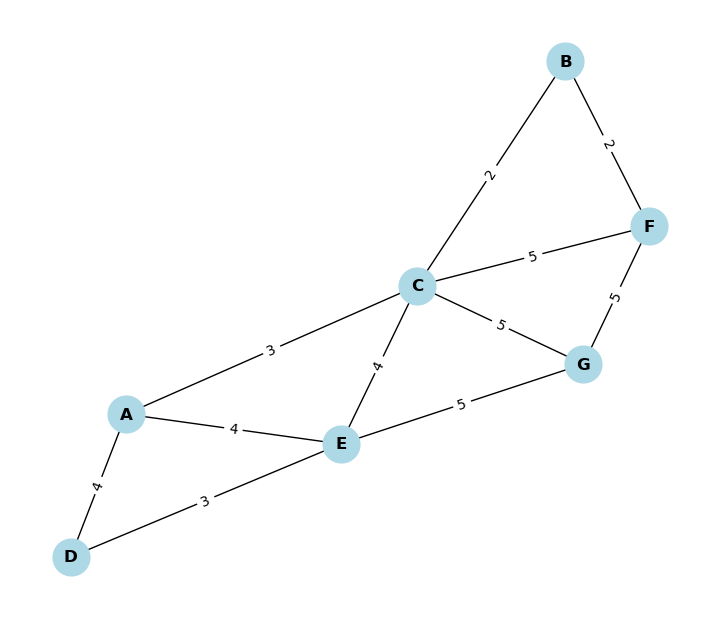

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

my_graph = {
    'A': [('C', 3), ('D', 4), ('E', 4)],
    'B': [('C', 2), ('F', 2)],
    'C': [('A', 3), ('B', 2), ('E', 4), ('F', 5), ('G', 5)],
    'D': [('A', 4), ('E', 2)],
    'E': [('A', 4), ('C', 4), ('D', 3), ('G', 5)],
    'F': [('B', 2), ('C', 5), ('G', 5)],
    'G': [('C', 5), ('F', 5)]
}

G = nx.Graph()
for node, neighbors in my_graph.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G, seed=42)
nx.set_node_attributes(G, pos, 'pos')
plt.figure(figsize=(7,6))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()


## Prim's Algorithm

In [21]:
import heapq
from collections import defaultdict, deque

def prim_mst(n, edges):
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w))
    
    visited = set()
    mst_edges = []
    total_cost = 0
    min_heap = [(0, 1, -1)]  # (weight, node, parent)
    
    while min_heap and len(visited) < n:
        w, u, parent = heapq.heappop(min_heap)
        if u in visited:
            continue
        visited.add(u)
        if parent != -1:
            mst_edges.append((parent, u, w))
            total_cost += w
        
        for v, weight in graph[u]:
            if v not in visited:
                heapq.heappush(min_heap, (weight, v, u))
    
    return mst_edges, total_cost


def max_edge_on_path(mst_graph, start, end):
    parent = {start: (None, 0)}
    queue = deque([start])
    
    while queue:
        node = queue.popleft()
        if node == end:
            break
        for neigh, w in mst_graph[node]:
            if neigh not in parent:
                parent[neigh] = (node, w)
                queue.append(neigh)
    
    # Trace back and find the max edge weight
    max_w = 0
    node = end
    while parent[node][0] is not None:
        max_w = max(max_w, parent[node][1])
        node = parent[node][0]
    
    return max_w


def find_best_extra_edge(n, all_edges, mst_edges):
    mst_set = {(min(u, v), max(u, v)) for u, v, _ in mst_edges}
    mst_graph = defaultdict(list)
    for u, v, w in mst_edges:
        mst_graph[u].append((v, w))
        mst_graph[v].append((u, w))
    
    min_increase = float('inf')
    best_edge = None
    
    for u, v, w in all_edges:
        if (min(u, v), max(u, v)) not in mst_set:
            w_max = max_edge_on_path(mst_graph, u, v)
            increase = w - w_max
            if increase > 0 and increase < min_increase:
                min_increase = increase
                best_edge = (u, v, w)
    
    return best_edge, min_increase

if __name__ == "__main__":
    N, E = 5, 7
    edges = [
        (1, 2, 2),
        (1, 3, 3),
        (2, 3, 1),
        (2, 4, 4),
        (3, 4, 5),
        (3, 5, 6),
        (4, 5, 7)
    ]
    
    mst_edges, total_cost = prim_mst(N, edges)
    
    print("Edges in MST:")
    for u, v, w in mst_edges:
        print(f"{u} - {v} : {w}")
    print(f"Total Minimum Installation Cost: {total_cost}")
    
    best_edge, inc = find_best_extra_edge(N, edges, mst_edges)
    if best_edge:
        print(f"\nEdge adding minimal increase: {best_edge[0]} - {best_edge[1]} : {best_edge[2]}")
        print(f"New Total Cost: {total_cost + inc}")
    else:
        print("\nNo extra edge found that increases cost minimally.")

Edges in MST:
1 - 2 : 2
2 - 3 : 1
2 - 4 : 4
3 - 5 : 6
Total Minimum Installation Cost: 13

Edge adding minimal increase: 1 - 3 : 3
New Total Cost: 14
